WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Group 1 mean, Group 2 mean, nu - 2.5, Group 1 log sigma, Group 2 log sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


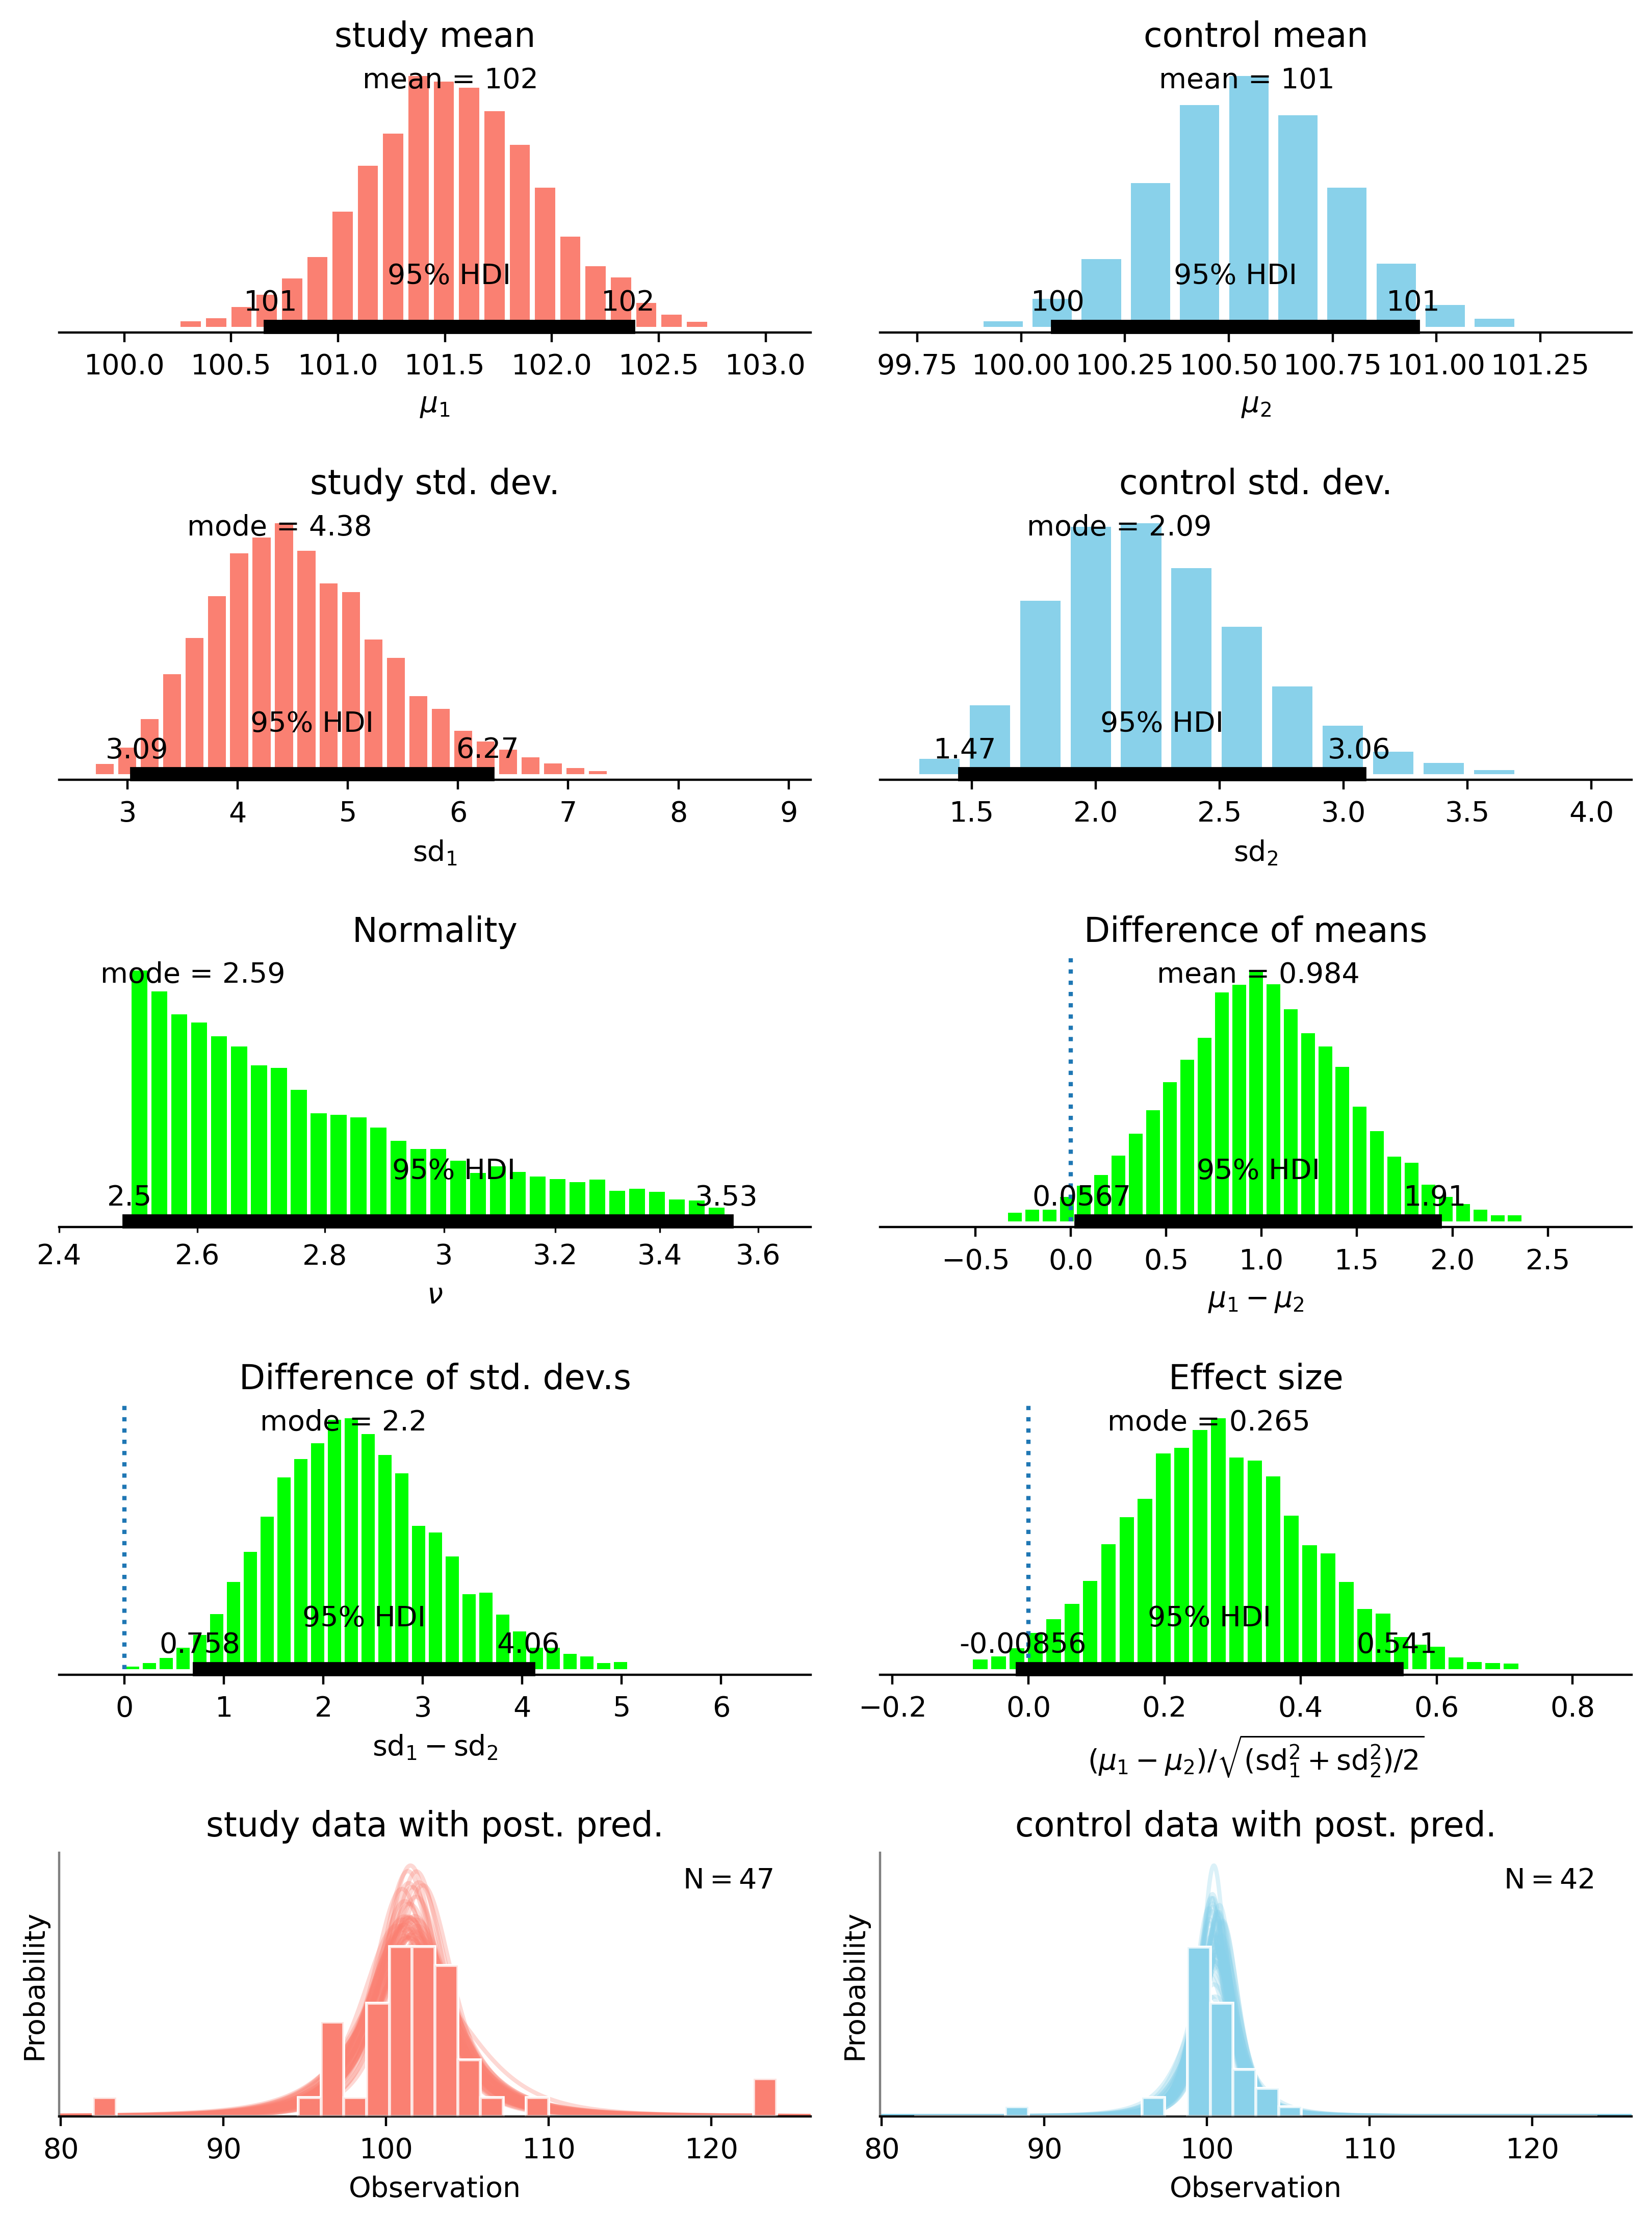

In [1]:
from bayes_test import BayesianHypothesisTest
import pandas as pd

draws = 2000

study = [101, 100, 102, 104, 102, 97, 105, 105, 98, 101, 100, 123, 105, 103,
         100, 95, 102, 106, 109, 102, 82, 102, 100, 102, 102, 101, 102, 102,
         103, 103, 97, 97, 103, 101, 97, 104, 96, 103, 124, 101, 101, 100,
         101, 101, 104, 100, 101]

# IQ scores of those who took a placebo pill
control = [99, 101, 100, 101, 102, 100, 97, 101, 104, 101, 102, 102, 100, 105,
           88, 101, 100, 104, 100, 100, 100, 101, 102, 103, 97, 101, 101, 100,
           101, 99, 101, 100, 100, 101, 100, 99, 101, 100, 102, 99, 100, 99]

df1 = pd.DataFrame({'IQ' : control})
df2 = pd.DataFrame({'IQ' : study})
df1['group'] = 'control'
df2['group'] = 'study'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTest(df=df,
                                   group1_name='study',
                                   group2_name='control',
                                   value_column='IQ',
                                   category_column='group')
study_test.run_model(draws)
study_test.plot_results()

In [2]:
study_test.value_storage

{'Group 1 mean': {'mean': 101.5528085193782,
  'hdi_min': 101.1283182869722,
  'hdi_max': 101.96106731681141},
 'Group 2 mean': {'mean': 100.47627547090832,
  'hdi_min': 100.13972387290676,
  'hdi_max': 100.80897458663291},
 'Group 1 SD': {'mode': 1.5399112406209707,
  'hdi_min': 1.1427357450289004,
  'hdi_max': 2.080070389115548},
 'Group 2 SD': {'mode': 0.8949058956393843,
  'hdi_min': 0.6672134136239961,
  'hdi_max': 1.2087767045555542},
 'Normality': {'mode': 2.5106722689641057,
  'hdi_min': 2.50001271964638,
  'hdi_max': 2.622162428502938},
 'Difference of means': {'mean': 1.077046559420251,
  'hdi_min': 0.5384625846604507,
  'hdi_max': 1.6123364907549131},
 'Difference of SDs': {'mode': 0.6239032754943437,
  'hdi_min': 0.09736987618321602,
  'hdi_max': 1.2114524268743603},
 'Effect size': {'mode': 0.7742564528729647,
  'hdi_min': 0.3931936395793236,
  'hdi_max': 1.3287639959238418}}

In [ ]:
study_test_skew = BayesianHypothesisTest(df=df,
                                   group1_name='study',
                                   group2_name='control',
                                   value_column='IQ',
                                   category_column='group')
study_test.run_skewed_model(draws)
study_test.plot_results()